In [2]:
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-5, end.month, end.day)

In [4]:
#Download data in a df for CELH

stock = "CELH"
CELH_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
CELH_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-14,1.293333,1.300000,1.206667,1.260000,1.260000,365700
2019-03-15,1.266667,1.616667,1.266667,1.616667,1.616667,1044000
2019-03-18,1.486667,1.666667,1.443333,1.663333,1.663333,579300
2019-03-19,1.663333,1.666667,1.600000,1.656667,1.656667,299100
2019-03-20,1.663333,1.663333,1.543333,1.610000,1.610000,210600


EDA for CELH data

In [7]:
CELH_data.shape

(1260, 6)

In [8]:
CELH_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,22.498944,23.166862,21.855902,22.531648,22.531648,2.960438e+06
std,18.967475,19.450527,18.544882,19.011916,19.011916,2.965184e+06
min,1.056667,1.080000,1.020000,1.056667,1.056667,3.990000e+04
25%,3.119166,3.245833,3.074167,3.161666,3.161666,1.502100e+06
50%,20.360000,21.243333,19.471666,20.448333,20.448333,2.529300e+06
75%,32.568333,33.526669,31.595833,32.577501,32.577501,3.572100e+06
max,96.500000,99.619904,92.500000,96.110001,96.110001,3.993630e+07


In [9]:
CELH_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2019-03-14 to 2024-03-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1260 non-null   float64
 1   High       1260 non-null   float64
 2   Low        1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Adj Close  1260 non-null   float64
 5   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [10]:
CELH_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of CELH data')

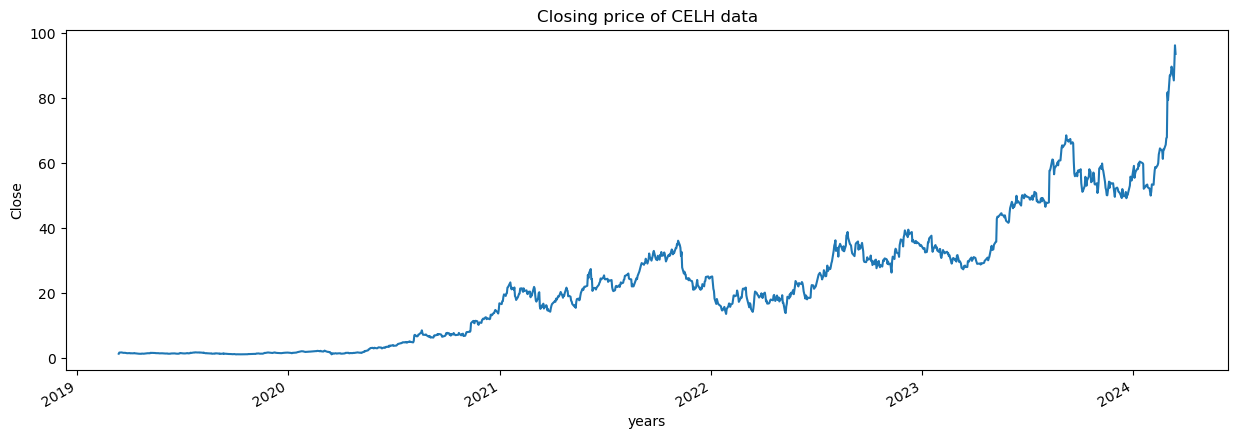

In [12]:
#Plot The data for Adj Close for 5 years
plt.figure(figsize = (15,5))
CELH_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of CELH data")

In [13]:
#Function to plot graphs so that it can re-used
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of CELH data")

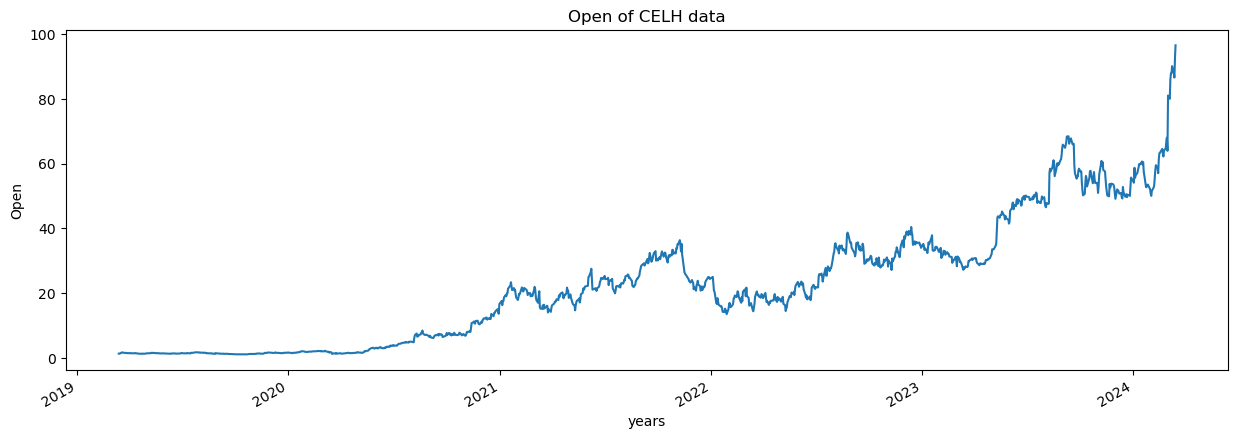

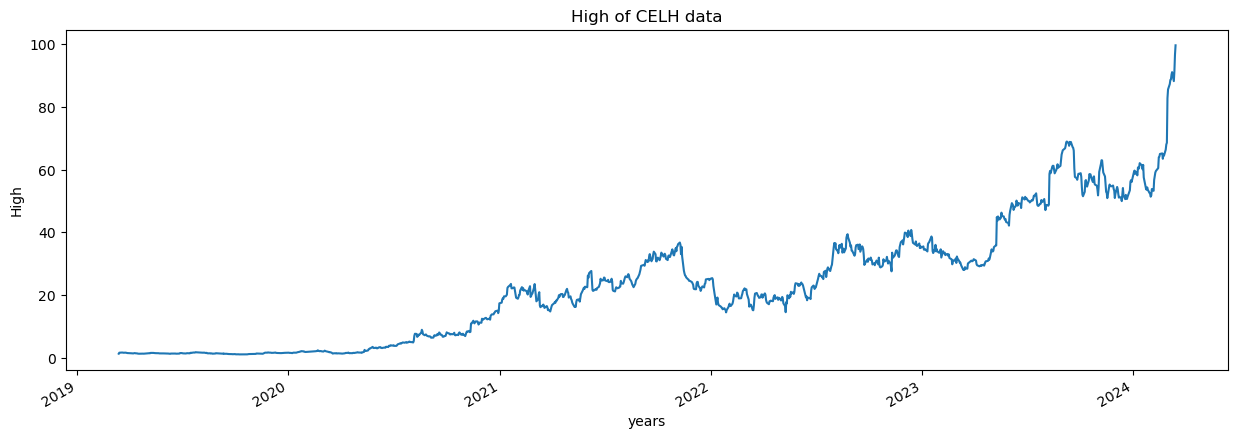

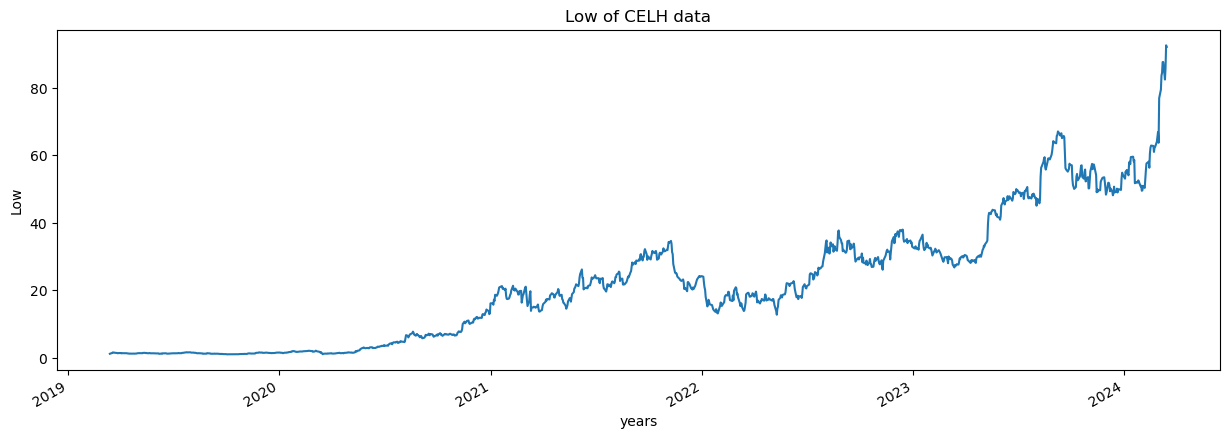

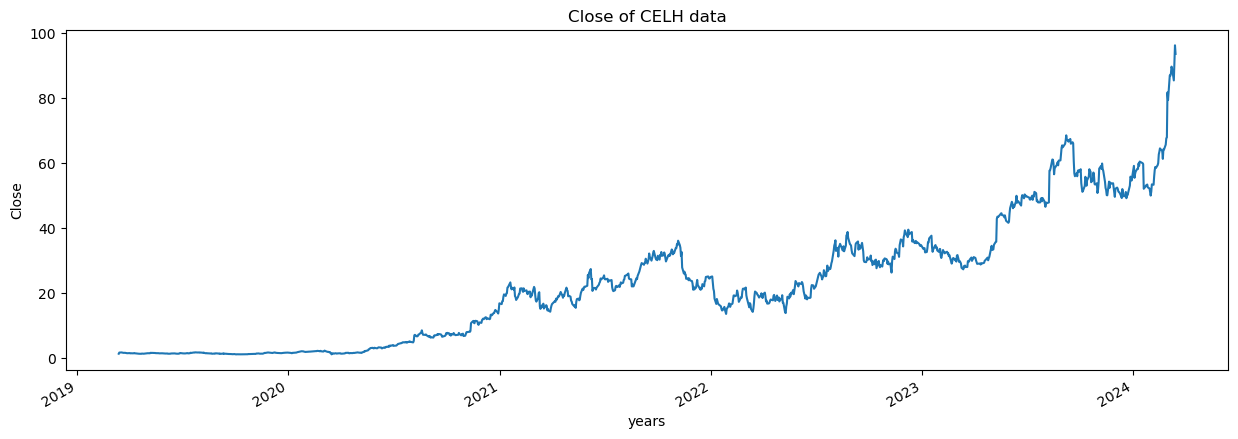

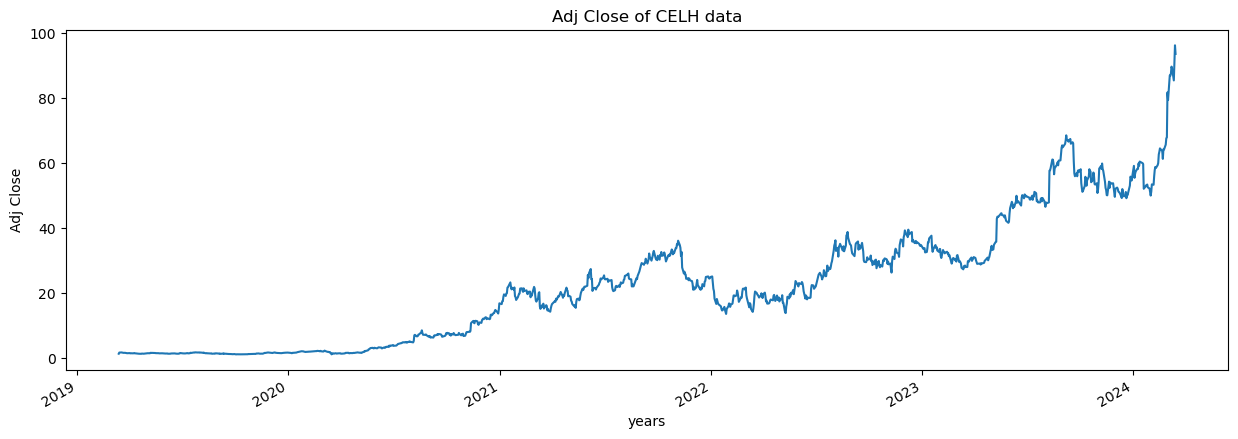

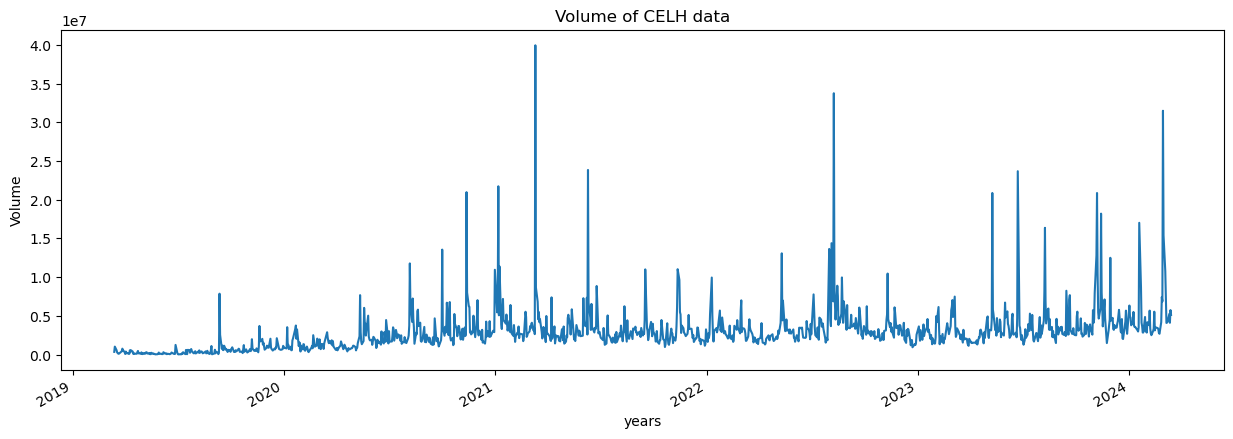

In [14]:
for column in CELH_data.columns:
    plot_graph((15,5),CELH_data[column], column)

Because of the sequential nature of time-series data, we need a way to aggregate this sequence of information. From all the potential techniques, the most intuitive one is MA with the ability to smooth out short-term fluctuations.

In [15]:
#Finding the data in each year 
for i in range(2019,2024):
    print(i,list(CELH_data.index.year).count(i))

2019 203
2020 253
2021 252
2022 251
2023 250


In [16]:
#Finding MA for 250 days based on above data 
CELH_data['MA_for_250_days'] = CELH_data['Close'].rolling(250).mean()

In [17]:
CELH_data['MA_for_250_days'][0:250].tail()

Date
2020-03-04         NaN
2020-03-05         NaN
2020-03-06         NaN
2020-03-09         NaN
2020-03-10    1.466973
Name: MA_for_250_days, dtype: float64

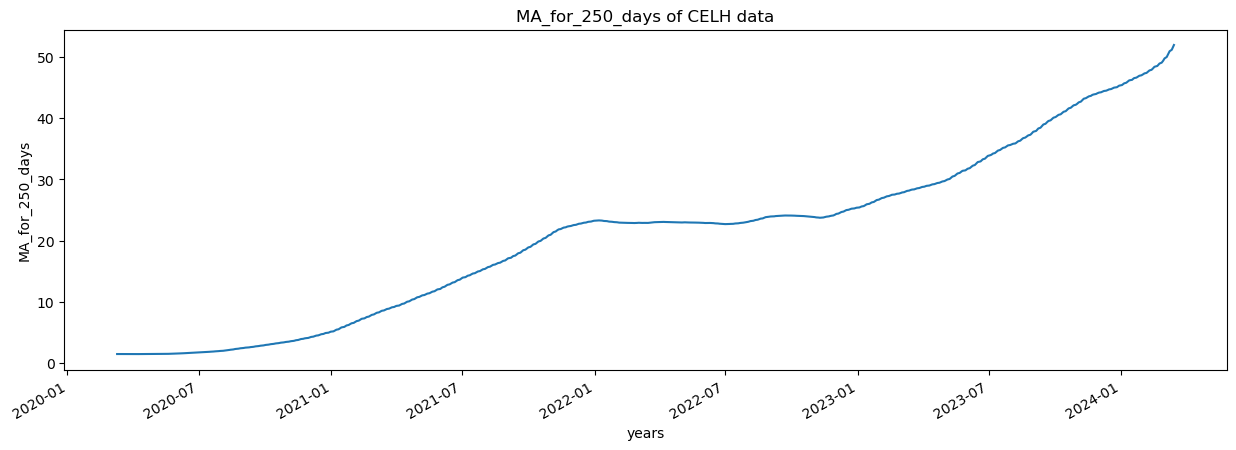

In [18]:
plot_graph((15,5), CELH_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

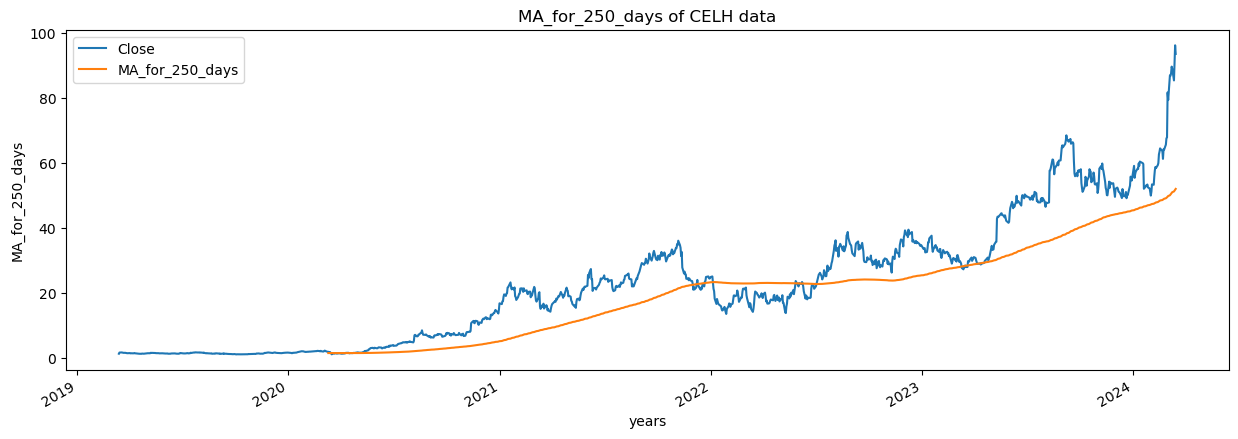

In [20]:
plot_graph((15,5), CELH_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

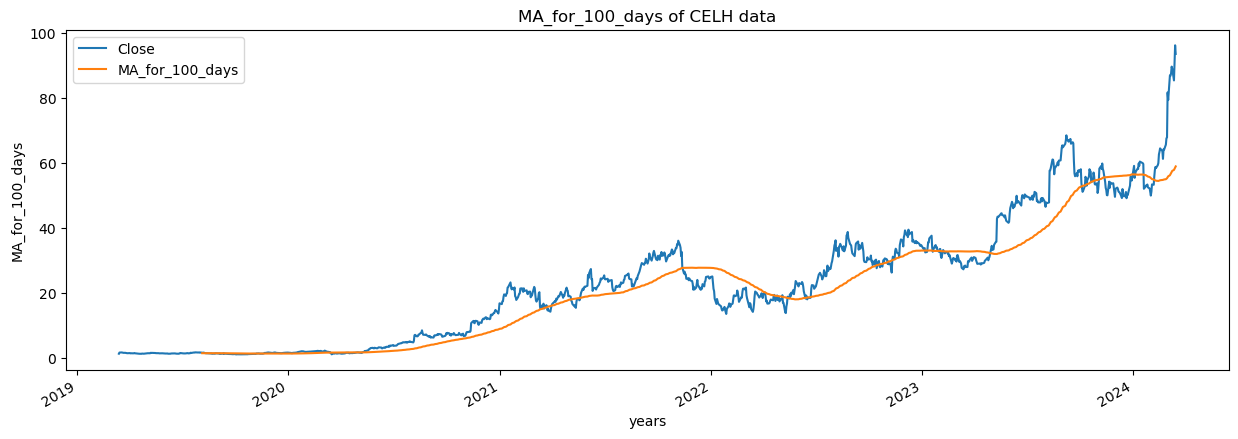

In [21]:
#Finding MA for 100 days
CELH_data['MA_for_100_days'] = CELH_data['Close'].rolling(100).mean()
plot_graph((15,5), CELH_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

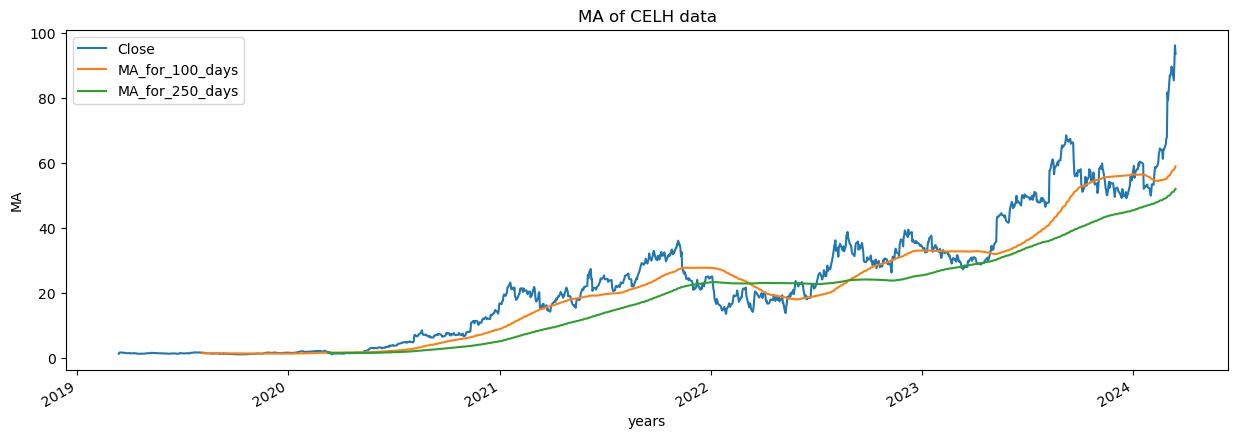

In [23]:
#Comparing MA for 100 and 250 days
plot_graph((15,5), CELH_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

The MA value of 100 seems to be fitting well

In [24]:
close_price = CELH_data[['Close']]

In [25]:
#Find Min , Max value for the close price
max(close_price.values),min(close_price.values) 

(array([96.11000061]), array([1.05666697]))

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.00213915],
       [0.00589143],
       [0.00638238],
       ...,
       [0.94697713],
       [1.        ],
       [0.9721209 ]])

In [27]:
len(scaled_data)

1260

In [28]:
#As the MA =100 , x_data will be from 0-100 and y values thereafter.
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [29]:
x_data[0],y_data[0]

(array([[0.00213915],
        [0.00589143],
        [0.00638238],
        [0.00631225],
        [0.00582129],
        [0.00564595],
        [0.00501472],
        [0.00508486],
        [0.00466405],
        [0.00424323],
        [0.00396268],
        [0.00382241],
        [0.00424323],
        [0.00420816],
        [0.00336653],
        [0.00368214],
        [0.00354186],
        [0.0034016 ],
        [0.00389255],
        [0.0043835 ],
        [0.00343666],
        [0.00336653],
        [0.00270023],
        [0.00255996],
        [0.00210408],
        [0.00210408],
        [0.00192874],
        [0.0026301 ],
        [0.00248982],
        [0.00213915],
        [0.00220929],
        [0.00301584],
        [0.0034016 ],
        [0.0034016 ],
        [0.0035068 ],
        [0.00378735],
        [0.00364707],
        [0.00368214],
        [0.00508486],
        [0.00452378],
        [0.00490952],
        [0.0044887 ],
        [0.00434843],
        [0.00452378],
        [0.0044887 ],
        [0

In [30]:
int(len(x_data)*0.7)

812

In [31]:
1260-100-int(len(x_data)*0.7)

348

In [32]:
#Splitting data into 70:30 as train and test data respectively


splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(812, 100, 1)
(812, 1)
(348, 100, 1)
(348, 1)


In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [35]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2

812/812 [==============================] - 34s 35ms/step - loss: 7.5902e-04
Epoch 2/2
812/812 [==============================] - 31s 38ms/step - loss: 3.2601e-04


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
predictions = model.predict(x_test)

11/11 [==============================] - 1s 35ms/step


In [40]:
predictions

array([[0.28556153],
       [0.28892148],
       [0.29540068],
       [0.29982987],
       [0.30484128],
       [0.30768147],
       [0.30820253],
       [0.303242  ],
       [0.30027544],
       [0.29578912],
       [0.29300702],
       [0.2865244 ],
       [0.27678347],
       [0.28069797],
       [0.2927772 ],
       [0.3018089 ],
       [0.31529313],
       [0.32862946],
       [0.33657235],
       [0.33688718],
       [0.33311638],
       [0.32543668],
       [0.33058676],
       [0.344274  ],
       [0.35510358],
       [0.3559991 ],
       [0.36285427],
       [0.37156662],
       [0.3828496 ],
       [0.38656873],
       [0.38708112],
       [0.383113  ],
       [0.38651407],
       [0.38601264],
       [0.38623115],
       [0.3870918 ],
       [0.3883534 ],
       [0.3793314 ],
       [0.37175483],
       [0.36366585],
       [0.35863855],
       [0.3582558 ],
       [0.3574021 ],
       [0.35823292],
       [0.35759598],
       [0.35513362],
       [0.35277843],
       [0.351

In [41]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[28.200243],
       [28.519615],
       [29.135487],
       [29.556496],
       [30.032846],
       [30.302816],
       [30.352345],
       [29.880829],
       [29.598848],
       [29.17241 ],
       [28.90796 ],
       [28.291765],
       [27.365858],
       [27.737944],
       [28.886116],
       [29.744608],
       [31.026329],
       [32.29399 ],
       [33.048992],
       [33.078915],
       [32.72049 ],
       [31.990507],
       [32.48004 ],
       [33.78106 ],
       [34.810444],
       [34.89557 ],
       [35.547176],
       [36.375313],
       [37.447796],
       [37.80131 ],
       [37.850018],
       [37.472836],
       [37.796116],
       [37.748455],
       [37.769226],
       [37.851032],
       [37.97095 ],
       [37.11338 ],
       [36.393204],
       [35.624317],
       [35.146458],
       [35.110073],
       [35.028927],
       [35.1079  ],
       [35.047356],
       [34.8133  ],
       [34.58943 ],
       [34.51166 ],
       [34.128613],
       [33.816204],


In [42]:
y_test

array([[0.2987095 ],
       [0.30607377],
       [0.30228644],
       [0.31052742],
       [0.30828307],
       [0.30645953],
       [0.29274793],
       [0.3005681 ],
       [0.29131015],
       [0.29397531],
       [0.27770374],
       [0.26469351],
       [0.30172535],
       [0.31624351],
       [0.30856362],
       [0.33384767],
       [0.34191331],
       [0.33854679],
       [0.32900829],
       [0.32585214],
       [0.31561229],
       [0.35331041],
       [0.37196662],
       [0.36698694],
       [0.34931264],
       [0.37933091],
       [0.38648475],
       [0.40121334],
       [0.38662506],
       [0.38851873],
       [0.37940102],
       [0.40349277],
       [0.38774723],
       [0.3931477 ],
       [0.39462055],
       [0.39581288],
       [0.36460232],
       [0.37042361],
       [0.36004347],
       [0.36158647],
       [0.36719735],
       [0.35955253],
       [0.36337496],
       [0.35720295],
       [0.35187264],
       [0.35145181],
       [0.35373124],
       [0.341

In [43]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[29.45000076],
       [30.14999962],
       [29.79000092],
       [30.57333374],
       [30.36000061],
       [30.18666649],
       [28.88333321],
       [29.62666702],
       [28.74666786],
       [29.        ],
       [27.4533329 ],
       [26.21666718],
       [29.73666763],
       [31.11666679],
       [30.38666725],
       [32.79000092],
       [33.55666733],
       [33.23666763],
       [32.33000183],
       [32.02999878],
       [31.05666733],
       [34.63999939],
       [36.41333389],
       [35.93999863],
       [34.25999832],
       [37.11333466],
       [37.79333115],
       [39.19333267],
       [37.80666733],
       [37.98666763],
       [37.11999893],
       [39.40999985],
       [37.91333389],
       [38.42666626],
       [38.56666565],
       [38.68000031],
       [35.71333313],
       [36.26666641],
       [35.27999878],
       [35.42666626],
       [35.95999908],
       [35.23333359],
       [35.59666824],
       [35.00999832],
       [34.50333405],
       [34

Since stock prices prediction is essentially a regression problem, the RMSE (Root Mean Squared Error) will be our current model evaluation metrics. 

In [44]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
rmse

2.650118337065165

The rmse value is low and LSTM model proves to be a good model to predict the stock prices 

In [46]:
import pandas as pd
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = CELH_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2022-10-25,29.450001,28.200243
2022-10-26,30.150000,28.519615
2022-10-27,29.790001,29.135487
2022-10-28,30.573334,29.556496
2022-10-31,30.360001,30.032846


<Figure size 640x480 with 0 Axes>

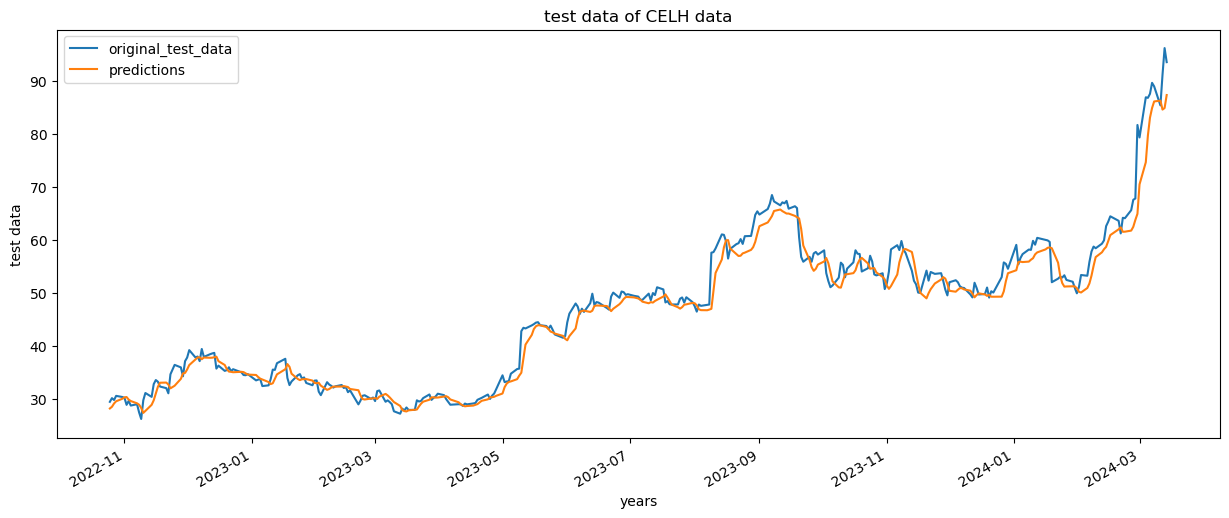

In [47]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

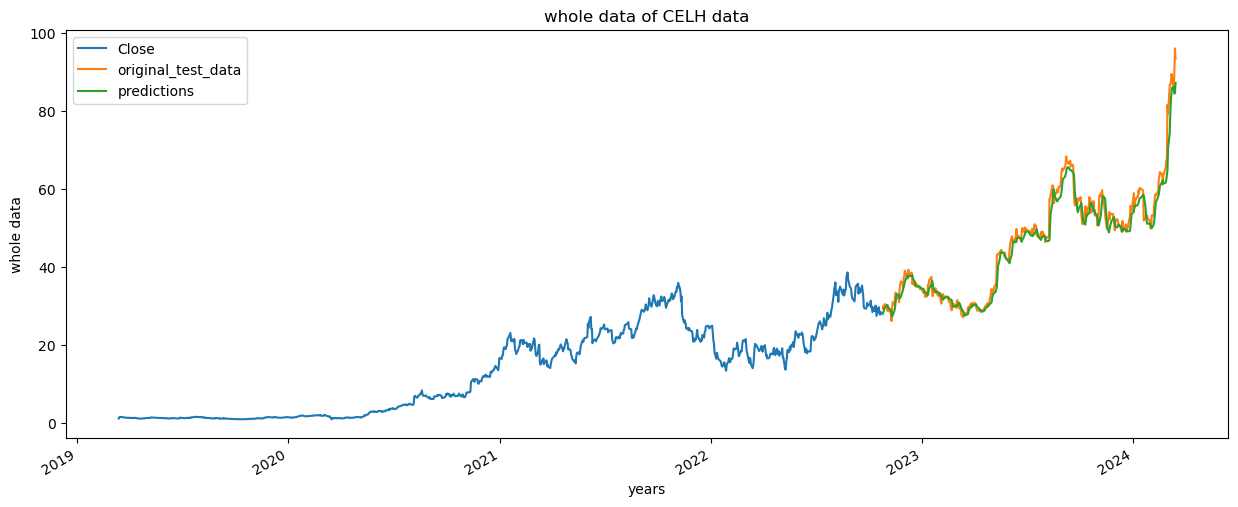

In [49]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [51]:
#Saving the model to be loaded in Streamlit
model.save("CELH_stock_price_model_0314.keras")